# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

The following visualizations and summary statistics offer good insights into the distribution of mice across drug regimens, gender distribution, and variations in tumor volume. Such insights are important to understand the effectiveness of different treatments in experimental studies.
The following are a set of noted observations: 

Observations in the gender distribution: The pie chart showing the distribution of female and male mice indicates a relatively balanced ratio, 
however there is a slightly higher proportion of male mice. Keeping an evenly balanced gender distribution is likely needed to mitigate 
any potential biases.

Observation of the drug regimen data: The bar plot showed that the distribution of observations across different drug regimens is not evenly
distributed. Certain regimens have significantly more observations than others. 
This uneven distribution could potentially influence the analysis and interpretation of experimental outcomes. 
As a potential follow up to this report, it would be worth investigating whether the Drug Regimens that have a higher number of observation 
in timepoints may or may not have a relationship to the lifespan of those mice. This investigation is so to further understand
any potential longivity a given regimen may provide as part of its treatment capabilties.

Observations in Tumor Volume Variation: When examining the tumor volume across various drug regimens, it reveals differences in 
mean tumor volume, as indicated in the summary table. Some regimens exhibit lower mean tumor volumes compared to others, 
suggesting variations in the result of the treatments. Further analysis may be required to understand why there is such delta as a 
follow up to this report. 

In [1]:
%matplotlib widget

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress  # Import the linregress function


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Reorder the columns in the desired order
# Merge the data into a single DataFrame, maintaining the order of the study_results DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Reorder the columns in the following order
combined_df = combined_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
combined_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
number_mice = combined_df['Mouse ID'].nunique()
number_mice


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Extract duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
# Display the duplicate mice by ID number
duplicate_mouse_ids


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Display the first few rows of the clean DataFrame to verify
clean_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = clean_df['Mouse ID'][2:].nunique() 
number_mice_clean



248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate these properties 

summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Assemble the resulting series into a single summary DataFrame
summary_df = pd.DataFrame(summary_stats)

# Display the summary DataFrame
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_one_line = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean', median='median', var='var', std='std', sem='sem')

# Rename columns for clarity
summary_stats_one_line.columns = ['mean', 'median', 'var', 'std', 'sem']

# Display the summary statistics table
summary_stats_one_line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

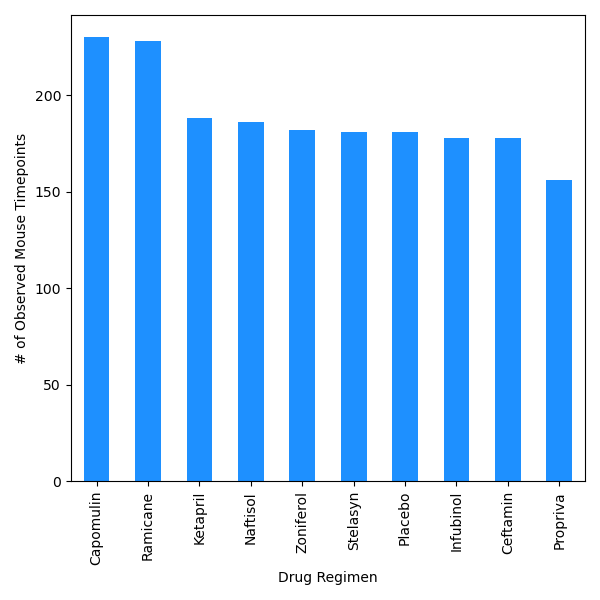

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the clean DataFrame by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = clean_df['Drug Regimen'].value_counts()

# Generate the bar plot
regimen_counts.plot(kind='bar', figsize=(6, 6), color='dodgerblue')

# Add title and labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()

# Display the plot
plt.show()

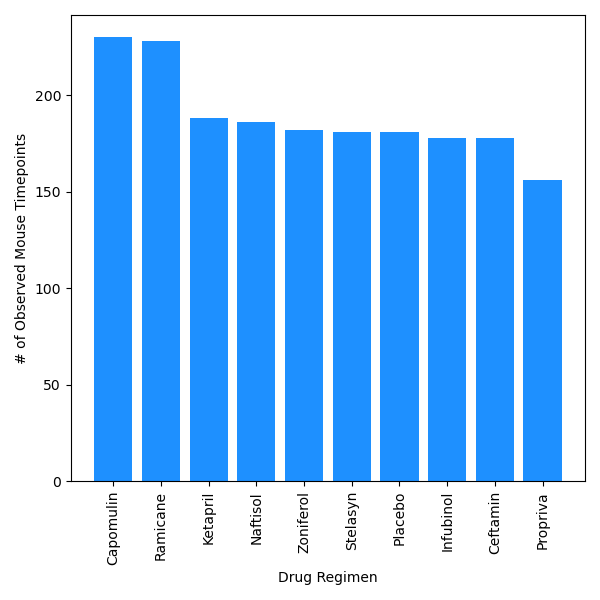

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Extract the drug regimens and corresponding counts
regimens = regimen_counts.index
counts = regimen_counts.values

# Create a bar plot
plt.figure(figsize=(6, 6))
plt.bar(regimens, counts, color='dodgerblue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()

# Show plot
plt.show()


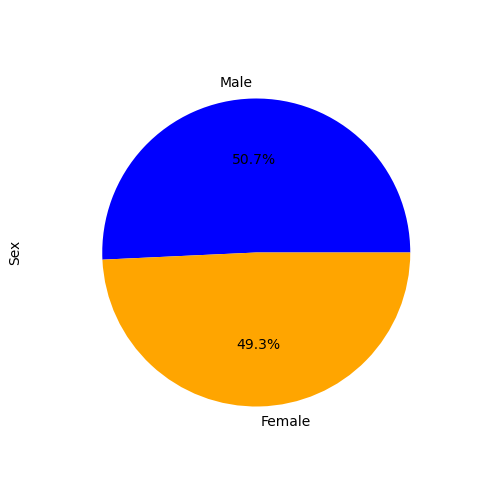

In [12]:
# Calculate the distribution of female and male mice
gender_distribution = clean_df['Sex'].value_counts()

# Create a new figure and axis for the pie chart
fig, ax = plt.subplots(figsize=(5, 5))

# Create a pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%0.1f%%', colors=['blue', 'orange'], startangle=360, ax=ax)

# y-axis label
ax.set_ylabel('Sex', labelpad=30)

# Ensure the aspect ratio is equal to create a circular pie
ax.set_aspect('equal')

# Show the pie chart
plt.show()


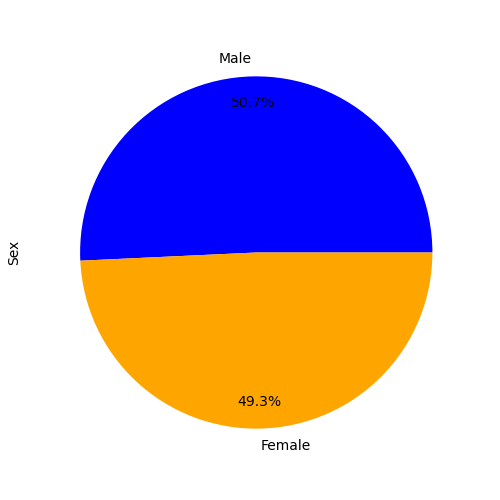

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Calculate the distribution of female and male mice
gender_distribution = clean_df['Sex'].value_counts()

# Create a new figure to ensure only the pie plot is displayed
plt.figure(figsize=(5, 5))

# Define colors
colors = ['blue', 'orange']

# Plot male and female portions on the same pie chart with male on top
plt.pie(gender_distribution, labels=gender_distribution.index, startangle=360, colors=colors,autopct=lambda pct: f'{pct:.1f}%', pctdistance=0.85)

# Add y-label
plt.ylabel('Sex', labelpad=30)
# Ensure equal aspect ratio for a circular pie
plt.axis('equal')

# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Group the data by mouse ID and treatment regimen
grouped_data = clean_df.groupby(['Mouse ID', 'Drug Regimen'])

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = grouped_data['Timepoint'].max()

# Next Filter the data to include only the final timepoint for each mouse
final_timepoints = clean_df[clean_df.apply(lambda x: (x['Mouse ID'], x['Timepoint']) in max_timepoints.items(), axis=1)]

# Next Extract the tumor volume at the final timepoint for each mouse
final_tumor_volumes = final_timepoints[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Next Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Group the original DataFrame by 'Mouse ID' and 'Drug Regimen' and get the maximum timepoint
grouped_max_timepoint = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max().reset_index()

# Merge the grouped DataFrame with the original DataFrame to get the tumor volume at the last timepoint
# Now merged_df contains the tumor volume at the last timepoint for each mouse
merged_df = pd.merge(grouped_max_timepoint, clean_df, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='left')

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)



In [15]:
## Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to store tumor volume data
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Iterate through each treatment regimen
for treatment in treatments:
    # Add subset by filter the DataFrame to include only the data for the current treatment regimen
    treatment_data = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Calculate quartiles (Q1 and Q3)
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    
    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine outliers using upper and lower bounds and locate potential outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print the treatment regimen and potential outliers
    print(f"{treatment}'s potential outliers:", (outliers))
   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


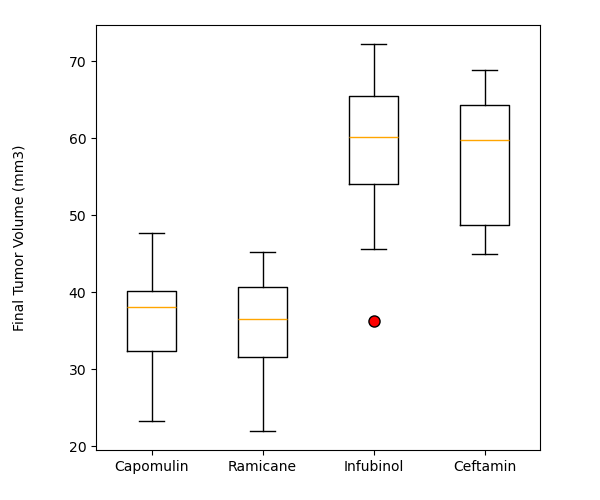

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Filter the data to include only the desired treatment groups
selected_treatments = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
treatment_positions = {'Capomulin': 1, 'Ramicane': 2, 'Infubinol': 3, 'Ceftamin': 4}
positions = [treatment_positions[treatment] for treatment in selected_treatments]
merged_df[merged_df['Drug Regimen'].isin(selected_treatments)].boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', figsize=(6, 5), grid=False, positions=positions, medianprops=dict(color='orange'), whiskerprops=dict(color='black'), boxprops=dict(color='black'), flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Create a dictionary to specify custom positions for each treatment group

# Set title to empty string
plt.title('')
# Set title to empty string
plt.suptitle('')
# Adjust layout to space out the y-axis from the ylabel
plt.subplots_adjust(left=0.16, right=0.9, top=0.95, bottom=0.10)
plt.xlabel('')
plt.ylabel('Final Tumor Volume (mm3)', labelpad=30)
plt.xticks(ticks=positions, labels=selected_treatments)  # Ensure correct tick labels
plt.show()


## Line and Scatter Plots

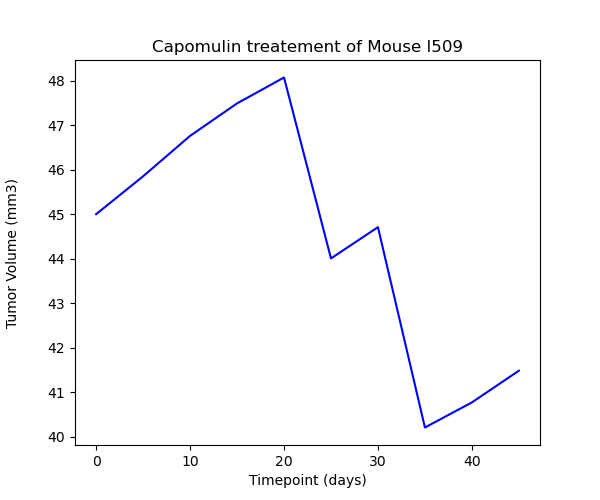

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter data for mice treated with Capomulin

capomulin_data = combined_df[combined_df['Drug Regimen'] == 'Capomulin']

# Choose a single mouse ID from Capomulin treated mice
mouse_id = 'l509'

# Filter data for the selected mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate line plot of tumor volume vs. time point
plt.figure(figsize=(6, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b', linestyle='-')

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)', labelpad=20)
plt.title(f'Capomulin treatement of Mouse {mouse_id}')

# Don't show grid
plt.grid(False)

# Show plot
plt.show()


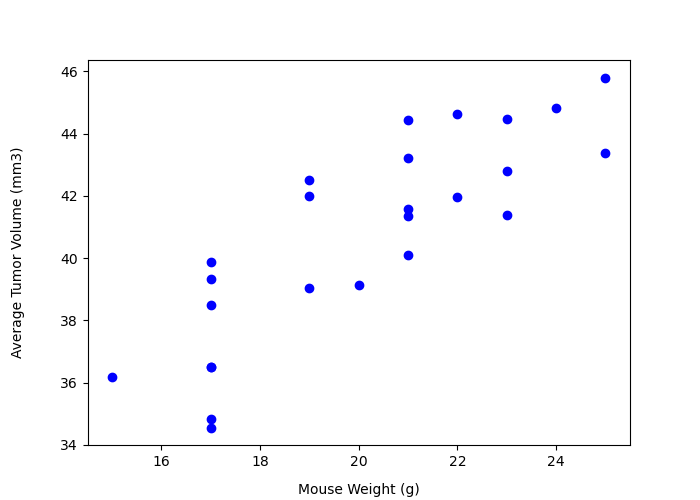

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for mice treated with Capomulin
capomulin_data = combined_df[combined_df['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(7, 5))
plt.scatter(mouse_weights, average_tumor_volume, color='b')

# Add labels and title
plt.xlabel('Mouse Weight (g)', labelpad=10)
plt.ylabel('Average Tumor Volume (mm3)', labelpad=25)

# Show plot
plt.grid(False)
plt.show()


## Correlation and Regression

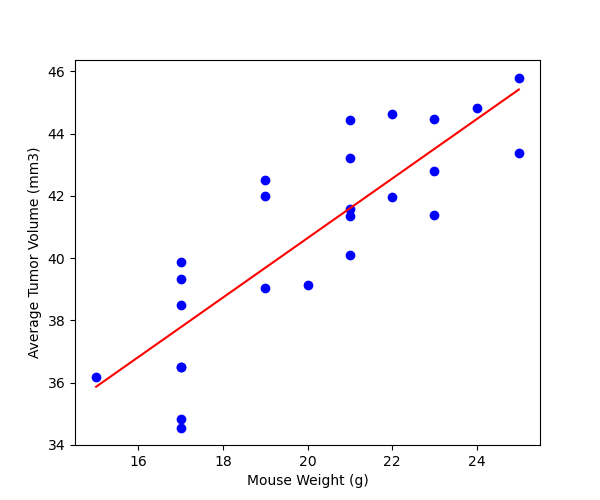

Correlation Coefficient: 0.8419363424694721


In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for mice treated with Capomulin
capomulin_data = combined_df[combined_df['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding weight for each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weights, average_tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

# Generate scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(6, 5))
plt.scatter(mouse_weights, average_tumor_volume, color='b', label='Data')

# Plot the linear regression line
x_values = np.linspace(min(mouse_weights), max(mouse_weights), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='r', label='Linear Regression')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.grid(False)
plt.show()

# Calculate correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weights, average_tumor_volume)
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)
